# Laboratory practice № 11 ($H_2$ & $H_{\infin}$)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 8

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
import scipy
import cvxpy as cp

In [37]:
from matplotlib import style
style.use('seaborn-v0_8-whitegrid')

In [106]:
import sympy
omega_i = sympy.Symbol("omega",real=True) * sympy.I

def get_fraction(num, den):
    den_ = sum((0 if abs(co) < 10**-3 else co)*omega_i**i for i, co in enumerate(reversed(den)))
    num_ = sum((0 if abs(co) < 10**-3 else co)*omega_i**i for i, co in enumerate(reversed(num)))
    return num_/den_

def get_singular(sys_for_an_tf):
    mat_ = sympy.Matrix([
        [get_fraction(sys_for_an_tf[0,0].num[0][0],sys_for_an_tf[0,0].den[0][0]), get_fraction(sys_for_an_tf[0,1].num[0][0],sys_for_an_tf[0,1].den[0][0]), get_fraction(sys_for_an_tf[0,2].num[0][0],sys_for_an_tf[0,2].den[0][0])],
        [get_fraction(sys_for_an_tf[1,0].num[0][0],sys_for_an_tf[1,0].den[0][0]), get_fraction(sys_for_an_tf[1,1].num[0][0],sys_for_an_tf[1,1].den[0][0]), get_fraction(sys_for_an_tf[1,2].num[0][0],sys_for_an_tf[1,2].den[0][0])]
    ])
    sing = sympy.Matrix(sympy.Abs(mat_).singular_values()).T
    sing.simplify() 
    return sing

## Task 1

$x = \begin{bmatrix}a \\ v\end{bmatrix}$

$\dot{x} = \begin{bmatrix}0 & 1 \\ 0 & 0\end{bmatrix}x + \begin{bmatrix}0 \\ \frac{1}{M}\end{bmatrix}u + \begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0\end{bmatrix}\begin{bmatrix}f_1 \\ f_2 \\ \xi\end{bmatrix}$

$y = \begin{bmatrix}1 &  0\end{bmatrix}x + \begin{bmatrix}0 & 0 & 1\end{bmatrix}\begin{bmatrix}f_1 \\ f_2 \\ \xi\end{bmatrix}$

$z = \begin{bmatrix}2 & 0 \\ 0 & 0\end{bmatrix}x + \begin{bmatrix}0 \\ 1 \end{bmatrix}u$

### Subtask 1

In [5]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [2, 0],
    [0, 0]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [6]:
def generate_LQR(a,b,q,r):
    k, p, _ = ctrl.lqr(a,b,q,r)
    return k, p

In [7]:
K_1_1, _ = generate_LQR(A,B_2,C_2.T@C_2,D_2.T@D_2)
K_1_1

array([[2., 2.]])

In [8]:
np.linalg.eigvals(A-B_2@K_1_1)

array([-1.+1.j, -1.-1.j])

In [9]:
sys_for_an = ctrl.ss(A-B_2@K_1_1,B_1,C_2-D_2@K_1_1,np.zeros((2,3)))
sys_for_an_tf = ctrl.ss2tf(sys_for_an)
sys_for_an_tf

TransferFunction([[array([2., 4.]), array([2.]), array([0.])], [array([-2.,  0.]), array([-2., -2.]), array([0.])]], [[array([1., 2., 2.]), array([1., 2., 2.]), array([1.])], [array([1., 2., 2.]), array([1., 2., 2.]), array([1.])]])

In [10]:
time_1 = np.linspace(0,30,int(30/0.005))
w = np.vstack([
    np.sin(time_1),
    np.cos(time_1*2),
    np.ones_like(time_1)
])
z = ctrl.forced_response(sys_for_an,time_1,X0=np.ones((2,1))*10,U=w)

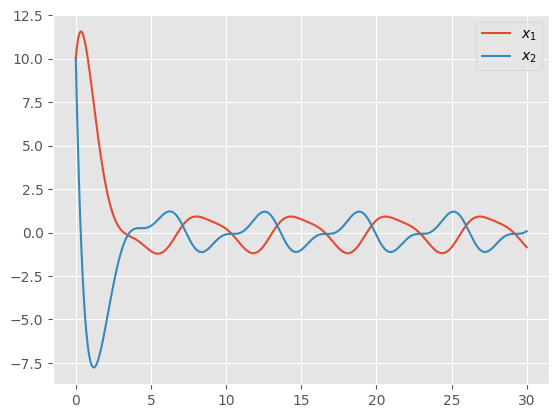

In [12]:
plt.plot(time_1,z.states[0],label="$x_1$")
plt.plot(time_1,z.states[1],label="$x_2$")
# plt.grid()
plt.legend()

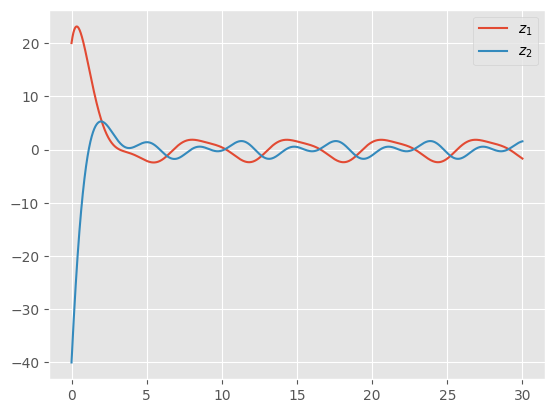

In [13]:
plt.plot(time_1,z.outputs[0],label="$z_1$")
plt.plot(time_1,z.outputs[1],label="$z_2$")
# plt.grid()
plt.legend()

In [14]:
g_o = ctrl.gram(sys_for_an,"o")
g_o

array([[4., 2.],
       [2., 2.]])

h_2 norm

In [15]:
np.sqrt(np.trace(B_1.T@g_o@B_1))

2.449489742783178

mfc

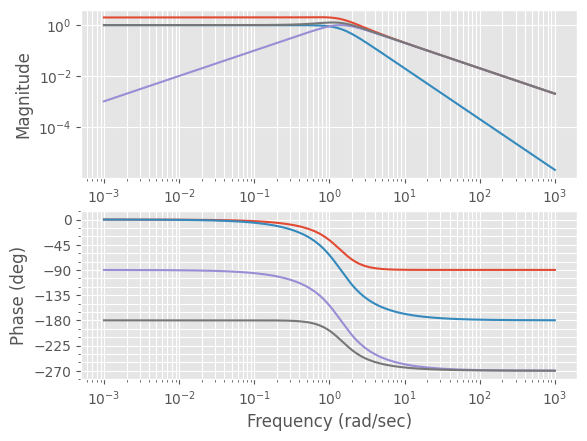

In [16]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [17]:
sys_for_an_tf

TransferFunction([[array([2., 4.]), array([2.]), array([0.])], [array([-2.,  0.]), array([-2., -2.]), array([0.])]], [[array([1., 2., 2.]), array([1., 2., 2.]), array([1.])], [array([1., 2., 2.]), array([1., 2., 2.]), array([1.])]])

svd

In [18]:
sing = get_singular(sys_for_an_tf)

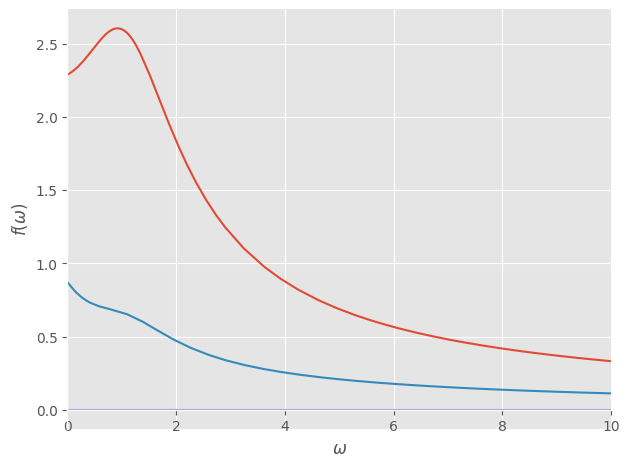

In [19]:
import sympy.plotting


p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

### Subtask 2

In [20]:
C_2 = np.array([
    [2, 0],
    [0, 1]
])

D_2 = np.array([
    [2],
    [0]
])

In [21]:
import scipy.linalg


def generate_H2(a,b_2,c_2,d_2):
    q = scipy.linalg.solve_continuous_are(a,b_2,c_2.T@c_2,d_2.T@d_2)
    return -np.linalg.inv(d_2.T@d_2)@b_2.T@q

In [22]:
K_2 = generate_H2(A,B_2,C_2,D_2)
K_2

array([[-1. , -1.5]])

In [23]:
np.linalg.eigvals(A+B_2@K_2)

array([-0.75+0.66143783j, -0.75-0.66143783j])

In [24]:
sys_for_an_1 = ctrl.ss(A+B_2@K_2,B_1,C_2+D_2@K_2,np.zeros((2,3)))
sys_for_an_tf = ctrl.ss2tf(sys_for_an_1)
sys_for_an_tf

TransferFunction([[array([-2.66453526e-15,  3.00000000e+00]), array([-3.00000000e+00, -2.66453526e-15]), array([0.])], [array([-1.]), array([1., 0.]), array([0.])]], [[array([1. , 1.5, 1. ]), array([1. , 1.5, 1. ]), array([1.])], [array([1. , 1.5, 1. ]), array([1. , 1.5, 1. ]), array([1.])]])

In [25]:
z = ctrl.forced_response(sys_for_an_1,time_1,X0=np.ones((2,1))*10,U=w)

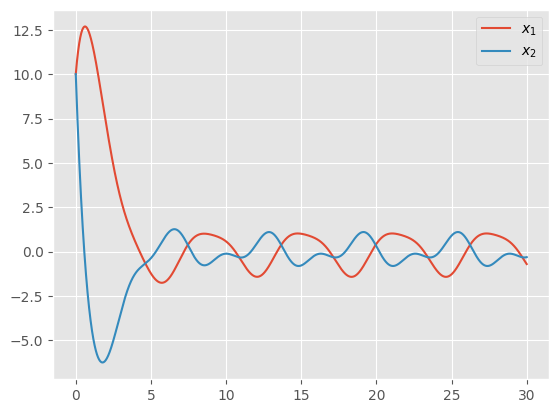

In [28]:
plt.plot(time_1,z.states[0],label="$x_1$")
plt.plot(time_1,z.states[1],label="$x_2$")
# plt.grid()
plt.legend()

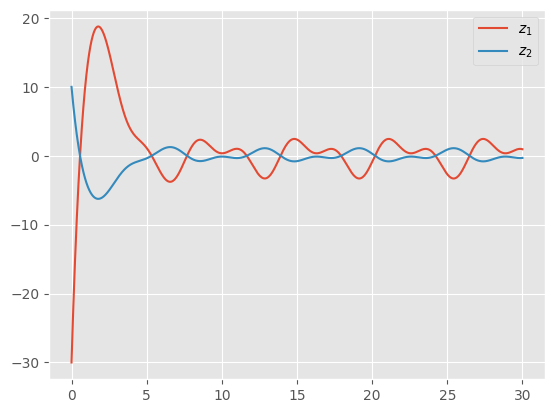

In [29]:
plt.plot(time_1,z.outputs[0],label="$z_1$")
plt.plot(time_1,z.outputs[1],label="$z_2$")
# plt.grid()
plt.legend()

In [30]:
g_o = ctrl.gram(sys_for_an_1,"o")
g_o

array([[3.33333333e+00, 8.32090887e-17],
       [8.32090887e-17, 3.33333333e+00]])

H_2 norm

In [31]:
g_o = ctrl.gram(sys_for_an_1,"o")
np.sqrt(np.trace(B_1.T@g_o@B_1))

2.5819888974716103

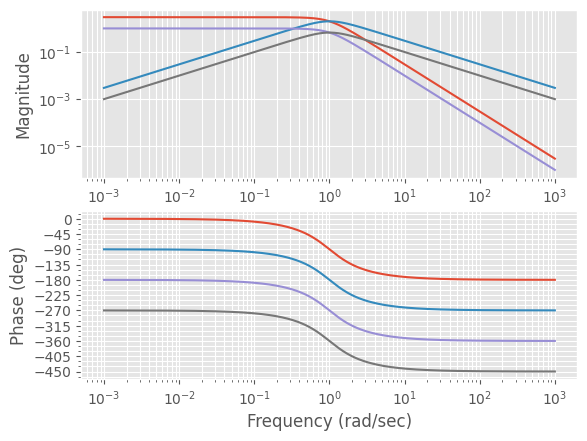

In [32]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [33]:
sys_for_an_tf

TransferFunction([[array([-2.66453526e-15,  3.00000000e+00]), array([-3.00000000e+00, -2.66453526e-15]), array([0.])], [array([-1.]), array([1., 0.]), array([0.])]], [[array([1. , 1.5, 1. ]), array([1. , 1.5, 1. ]), array([1.])], [array([1. , 1.5, 1. ]), array([1. , 1.5, 1. ]), array([1.])]])

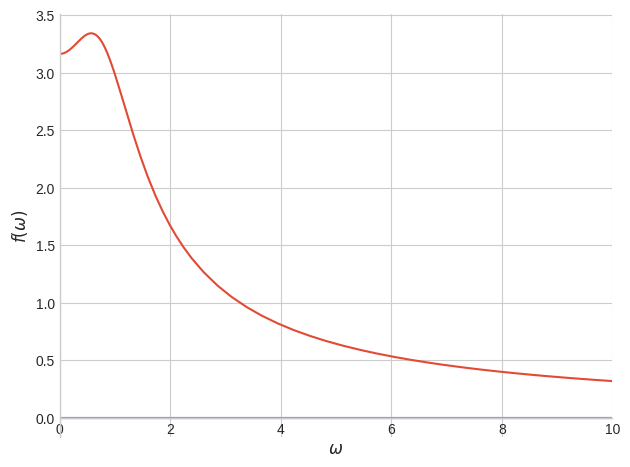

In [39]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

## Task 2

In [40]:
def generate_H2_obs(a,b_1,c_1,d_1):
    p = scipy.linalg.solve_continuous_are(a.T,c_1.T,b_1@b_1.T,d_1@d_1.T)
    return -p@ c_1.T @np.linalg.inv(d_1@d_1.T)

### Subtask 1

In [41]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [2, 0],
    [0, 0]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [42]:
K_2_1, _ = generate_LQR(A,B_2,C_2.T@C_2,D_2.T@D_2)
L_2_1 = generate_H2_obs(A,B_1,C_1,D_1)

In [43]:
K_2_1 = -K_2_1
K_2_1

array([[-2., -2.]])

In [44]:
L_2_1 

array([[-1.73205081],
       [-1.        ]])

In [45]:
A_new = np.block([
    [A + B_2@K_2_1, -B_2@K_2_1],
    [np.zeros_like(A), A + L_2_1@C_1]
]) 
B_new = np.block([
    [B_1],
    [L_2_1@D_1+B_1]
]) 
C_new = np.block([
    # [C_1, np.zeros_like(C_1)],
    # [C_1, -C_1],
    [C_2+D_2@K_2_1, -D_2@K_2_1],
    # [C_2+D_2@K_2_1, -C_2-D_2@K_2_1]
]) 
D_new = np.block([
    # [D_1],
    # [np.zeros_like(D_1)],
    [np.zeros((C_2.shape[0],D_1.shape[1]))],
    # [np.zeros((C_2.shape[0],D_1.shape[1]))]
]) 

In [46]:
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [47]:
w = np.vstack([
    np.sin(time_1),
    np.cos(time_1*2),
    0.5*np.sin(time_1)
])

In [48]:
out = ctrl.forced_response(sys_full,time_1,w,np.ones(4)*10)

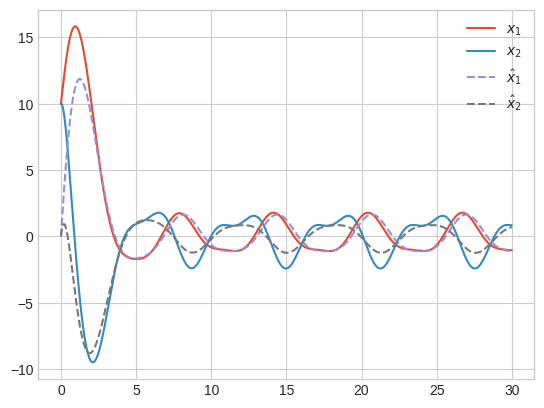

In [53]:
plt.plot(time_1,out.states[0],label="$x_1$")
plt.plot(time_1,out.states[1],label="$x_2$")
plt.plot(time_1,out.states[0]-out.states[2],linestyle='--',label="$\hat{x}_1$")
plt.plot(time_1,out.states[1]-out.states[3],linestyle='--',label="$\hat{x}_2$")
plt.legend()

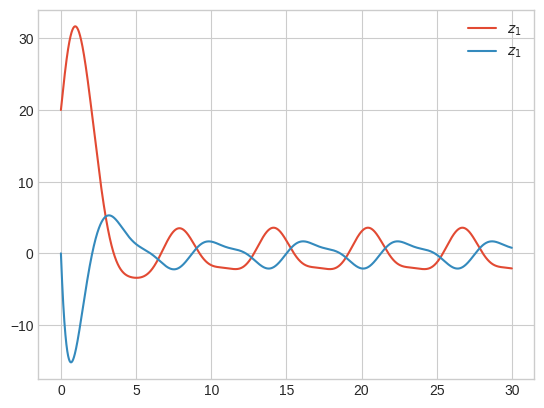

In [54]:
plt.plot(time_1,out.outputs[0],label="$z_1$")
plt.plot(time_1,out.outputs[1],label="$z_1$")
plt.legend()

In [55]:
sys_for_an_tf = ctrl.ss2tf(sys_full)
sys_for_an_tf

TransferFunction([[array([2.00000000e+00, 7.46410162e+00, 1.29282032e+01, 4.44089210e-15]), array([-1.11022302e-16,  2.00000000e+00,  7.46410162e+00,  1.29282032e+01]), array([-9.74736373e-17, -1.09282032e+01, -4.00000000e+00])], [array([-4.44089210e-16, -5.46410162e+00, -2.00000000e+00, -2.22044605e-16]), array([ 6.66133815e-16,  1.03186666e-15, -5.46410162e+00, -2.00000000e+00]), array([-5.46410162e+00, -2.00000000e+00,  7.54951657e-15,  2.49800181e-15])]], [[array([1.        , 3.73205081, 6.46410162, 5.46410162, 2.        ]), array([1.        , 3.73205081, 6.46410162, 5.46410162, 2.        ]), array([1.        , 3.73205081, 6.46410162, 5.46410162, 2.        ])], [array([1.        , 3.73205081, 6.46410162, 5.46410162, 2.        ]), array([1.        , 3.73205081, 6.46410162, 5.46410162, 2.        ]), array([1.        , 3.73205081, 6.46410162, 5.46410162, 2.        ])]])

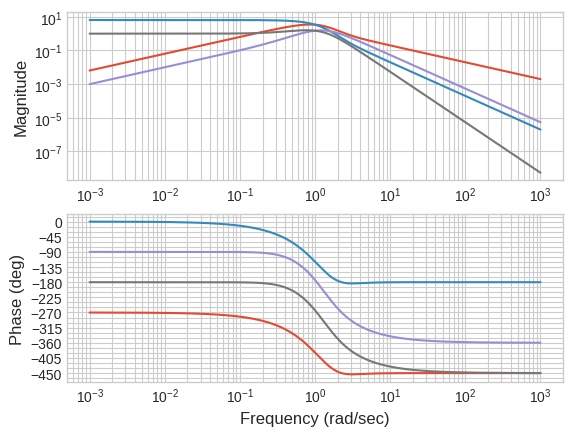

In [70]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

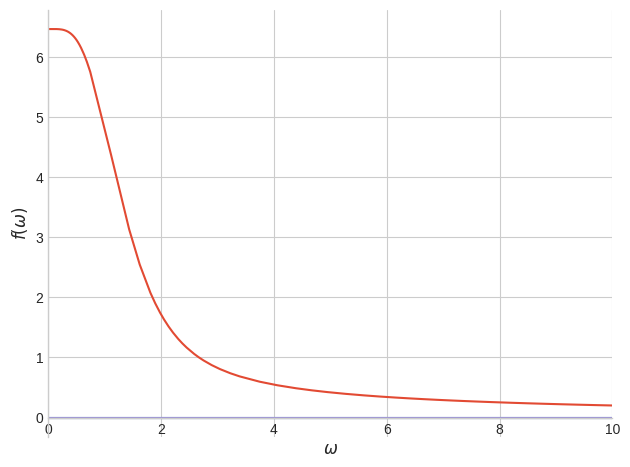

In [72]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [73]:
g_o = ctrl.gram(sys_full,"o")
np.sqrt(np.trace(B_new.T@g_o@B_new))

5.277916867529367

### Subtask 2

In [74]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [2, 0],
    [0, 2]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [1],
    [1]
])

In [75]:
K_2_2, _ = generate_LQR(A,B_2,C_2.T@C_2,D_2.T@D_2)
L_2_2 = generate_H2_obs(A,B_1,C_1,D_1)

In [76]:
K_2_2 = -K_2_2
K_2_2

array([[-1.41421356, -2.19736823]])

In [77]:
np.linalg.eigvals(A+B_2@K_2_2)

array([-1.09868411+0.45508986j, -1.09868411-0.45508986j])

In [78]:
L_2_2 

array([[-1.73205081],
       [-1.        ]])

In [79]:
np.linalg.eigvals(A+L_2_2@C_1)

array([-0.8660254+0.5j, -0.8660254-0.5j])

In [80]:
A_new = np.block([
    [A + B_2@K_2_2, -B_2@K_2_2],
    [np.zeros_like(A), A + L_2_2@C_1]
]) 
B_new = np.block([
    [B_1],
    [L_2_2@D_1+B_1]
]) 
C_new = np.block([
    # [C_1, np.zeros_like(C_1)],
    # [C_1, -C_1],
    [C_2+D_2@K_2_2, -D_2@K_2_2],
    # [C_2+D_2@K_2_1, -C_2-D_2@K_2_1]
]) 
D_new = np.block([
    # [D_1],
    # [np.zeros_like(D_1)],
    [np.zeros((C_2.shape[0],D_1.shape[1]))],
    # [np.zeros((C_2.shape[0],D_1.shape[1]))]
]) 

In [81]:
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [82]:
w = np.vstack([
    np.sin(time_1),
    np.cos(time_1*2),
    0.5*np.sin(time_1)
])

In [83]:
out = ctrl.forced_response(sys_full,time_1,w,np.ones(4)*10)

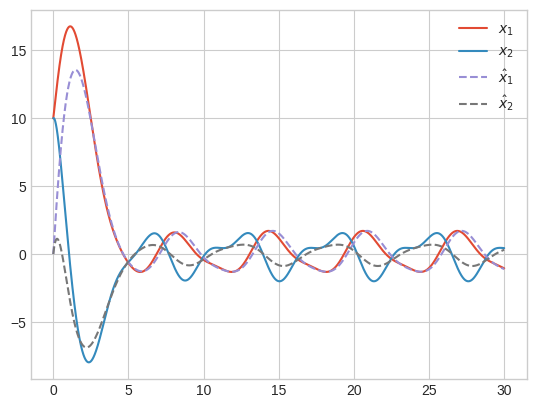

In [84]:
plt.plot(time_1,out.states[0],label="$x_1$")
plt.plot(time_1,out.states[1],label="$x_2$")
plt.plot(time_1,out.states[0]-out.states[2],linestyle='--',label="$\hat{x}_1$")
plt.plot(time_1,out.states[1]-out.states[3],linestyle='--',label="$\hat{x}_2$")
plt.legend()

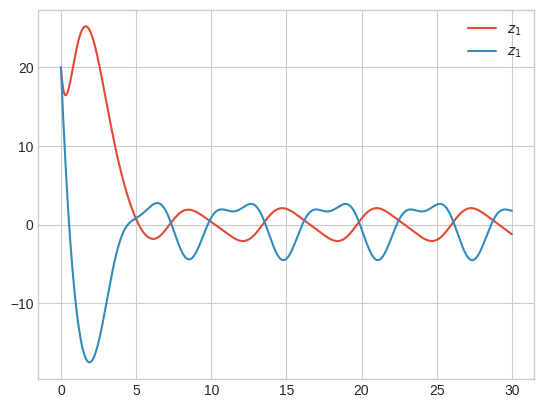

In [85]:
plt.plot(time_1,out.outputs[0],label="$z_1$")
plt.plot(time_1,out.outputs[1],label="$z_1$")
plt.legend()

In [86]:
sys_for_an_tf = ctrl.ss2tf(sys_full)
sys_for_an_tf

TransferFunction([[array([2.00000000e+00, 3.21198010e+00, 1.10261204e+01, 1.33226763e-15]), array([-5.76888806e-16,  2.00000000e+00,  3.21198010e+00,  1.10261204e+01]), array([-4.64685797, -1.41421356, -9.29371594, -2.82842712])], [array([ 6.61207724e-16, -4.64685797e+00, -1.07079295e+01, -2.82842712e+00]), array([ 2.        ,  7.85883807,  7.79347598, -1.41421356]), array([-4.64685797e+00, -1.07079295e+01, -2.82842712e+00, -1.81799020e-15])]], [[array([1.        , 3.92941903, 6.22016697, 4.64685797, 1.41421356]), array([1.        , 3.92941903, 6.22016697, 4.64685797, 1.41421356]), array([1.        , 3.92941903, 6.22016697, 4.64685797, 1.41421356])], [array([1.        , 3.92941903, 6.22016697, 4.64685797, 1.41421356]), array([1.        , 3.92941903, 6.22016697, 4.64685797, 1.41421356]), array([1.        , 3.92941903, 6.22016697, 4.64685797, 1.41421356])]])

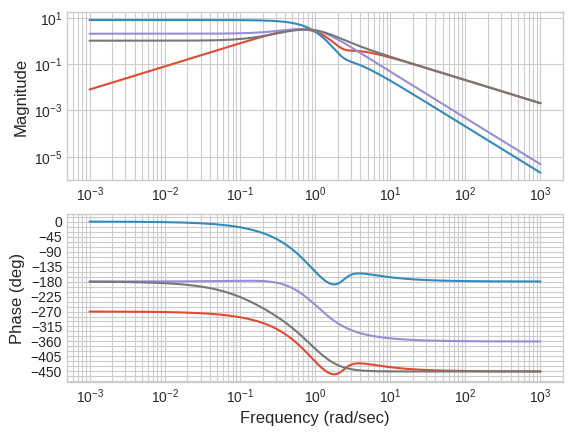

In [87]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

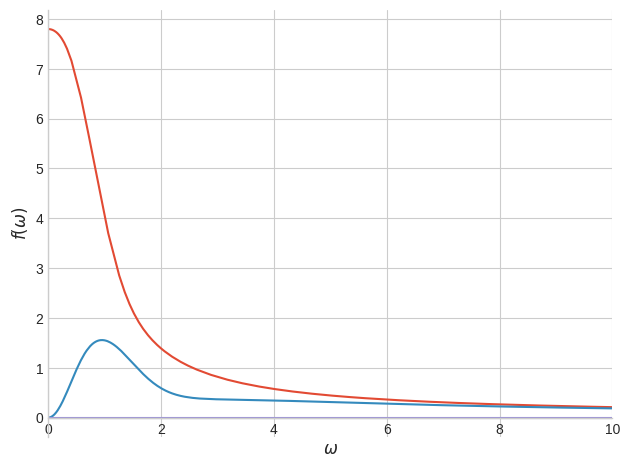

In [88]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [89]:
g_o = ctrl.gram(sys_full,"o")
np.sqrt(np.trace(B_new.T@g_o@B_new))

5.744078786461929

## Task 3

In [92]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [2, 0],
    [0, 0]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [93]:
C_2.T@D_2

array([[0],
       [0]])

In [94]:
def generate_Hinf(a,b_2,c_2,d_2,b_1,gamma):
    R = b_2@np.linalg.inv(d_2.T@d_2)@b_2.T-(gamma**-2)*b_1@b_1.T
    q = scipy.linalg.solve_continuous_are(a,np.identity(R.shape[0]),c_2.T@c_2,np.linalg.inv(R))
    return -np.linalg.inv(d_2.T@d_2)@b_2.T@q

In [95]:
K_3_1 = generate_Hinf(A,B_2,C_2,D_2,B_1,1.65)
K_3_2 = generate_Hinf(A,B_2,C_2,D_2,B_1,3)
K_3_3 = generate_Hinf(A,B_2,C_2,D_2,B_1,10)

In [96]:
K_3_1

array([[-32.8949786 , -27.05896132]])

In [97]:
K_3_2

array([[-2.77551566, -2.68474321]])

In [98]:
K_3_3

array([[-2.05130848, -2.04610881]])

In [100]:
np.linalg.eigvals(A+B_2@K_3_1)

array([ -1.27583352, -25.7831278 ])

In [101]:
np.linalg.eigvals(A+B_2@K_3_2)

array([-1.34237161+0.98668846j, -1.34237161-0.98668846j])

In [102]:
np.linalg.eigvals(A+B_2@K_3_3)

array([-1.0230544+1.00233137j, -1.0230544-1.00233137j])

In [103]:
sys_for_an_3 = ctrl.ss(A+B_2@K_3_1,B_1,C_2+D_2@K_3_1,np.zeros((2,3)))
sys_for_an_tf_3_1 = ctrl.ss2tf(sys_for_an_3)
sys_for_an_tf_3_1

TransferFunction([[array([ 2.        , 54.11792264]), array([2.]), array([0.])], [array([-3.28949786e+01,  1.56319402e-13]), array([-27.05896132, -32.8949786 ]), array([0.])]], [[array([ 1.        , 27.05896132, 32.8949786 ]), array([ 1.        , 27.05896132, 32.8949786 ]), array([1.])], [array([ 1.        , 27.05896132, 32.8949786 ]), array([ 1.        , 27.05896132, 32.8949786 ]), array([1.])]])

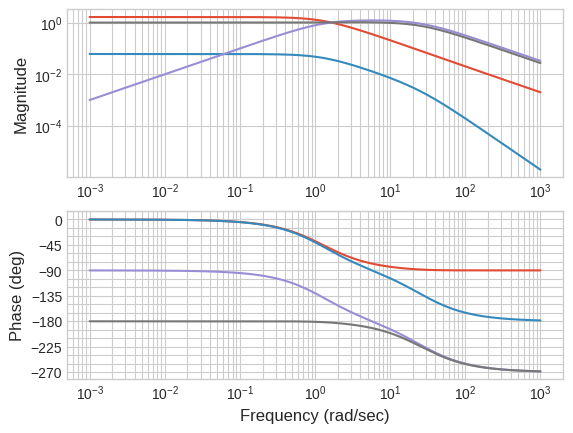

In [104]:
_ = ctrl.bode_plot(sys_for_an_tf_3_1[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_1[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_1[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_1[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [115]:
g_o = ctrl.gram(sys_for_an_3,"o")
np.sqrt(np.trace(B_1.T@g_o@B_1))

5.987779182378148

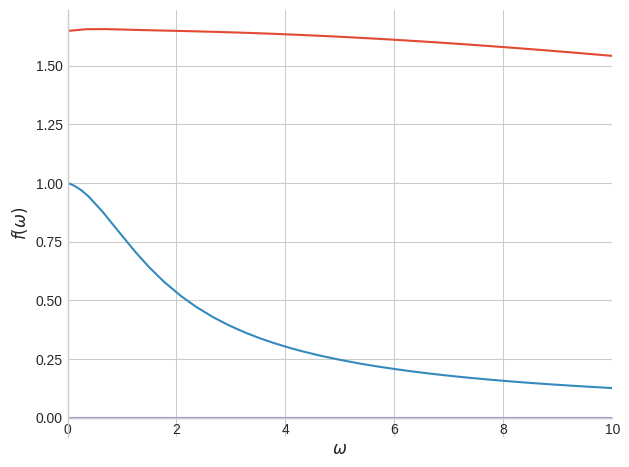

In [107]:
sing = get_singular(sys_for_an_tf_3_1)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [108]:
z = ctrl.forced_response(sys_for_an_3,time_1,X0=np.ones((2,1))*10,U=w)

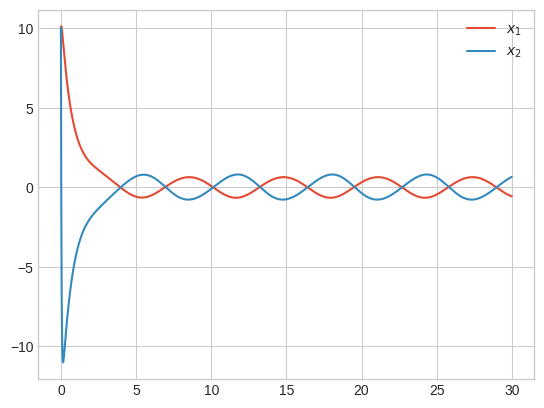

In [109]:
plt.plot(time_1,z.states[0],label="$x_1$")
plt.plot(time_1,z.states[1],label="$x_2$")
# plt.grid()
plt.legend()

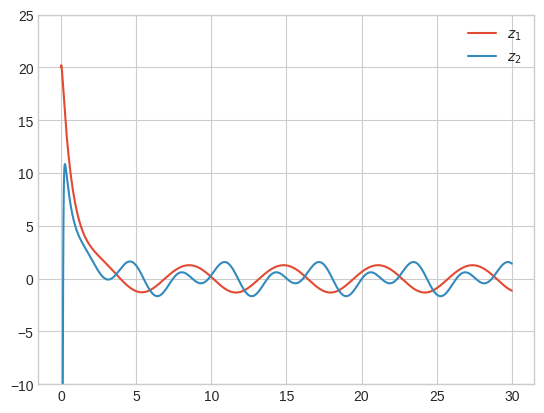

In [114]:
plt.plot(time_1,z.outputs[0],label="$z_1$")
plt.plot(time_1,z.outputs[1],label="$z_2$")
# plt.grid()
plt.ylim([-10,25])
plt.legend()

In [116]:
sys_for_an_3 = ctrl.ss(A+B_2@K_3_2,B_1,C_2+D_2@K_3_2,np.zeros((2,3)))
sys_for_an_tf_3_2 = ctrl.ss2tf(sys_for_an_3)
sys_for_an_tf_3_2

TransferFunction([[array([2.        , 5.36948643]), array([2.]), array([0.])], [array([-2.77551566e+00,  4.44089210e-16]), array([-2.68474321, -2.77551566]), array([0.])]], [[array([1.        , 2.68474321, 2.77551566]), array([1.        , 2.68474321, 2.77551566]), array([1.])], [array([1.        , 2.68474321, 2.77551566]), array([1.        , 2.68474321, 2.77551566]), array([1.])]])

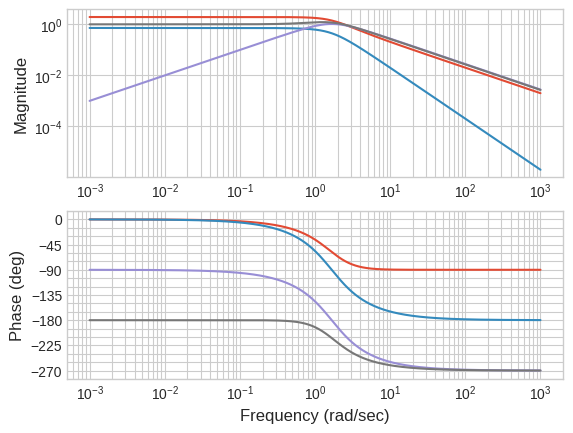

In [117]:
_ = ctrl.bode_plot(sys_for_an_tf_3_2[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_2[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_2[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_2[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [118]:
g_o = ctrl.gram(sys_for_an_3,"o")
np.sqrt(np.trace(B_1.T@g_o@B_1))

2.498378844200809

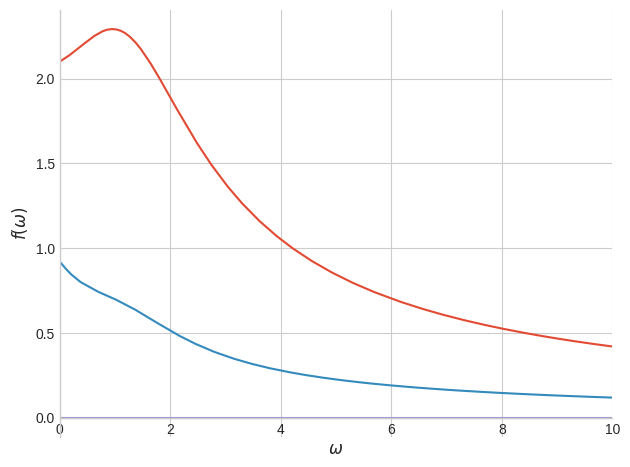

In [119]:
sing = get_singular(sys_for_an_tf_3_2)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [120]:
sys_for_an_3 = ctrl.ss(A+B_2@K_3_3,B_1,C_2+D_2@K_3_3,np.zeros((2,3)))
sys_for_an_tf_3_3 = ctrl.ss2tf(sys_for_an_3)
sys_for_an_tf_3_3

TransferFunction([[array([2.        , 4.09221761]), array([2.]), array([0.])], [array([-2.05130848e+00,  4.44089210e-16]), array([-2.04610881, -2.05130848]), array([0.])]], [[array([1.        , 2.04610881, 2.05130848]), array([1.        , 2.04610881, 2.05130848]), array([1.])], [array([1.        , 2.04610881, 2.05130848]), array([1.        , 2.04610881, 2.05130848]), array([1.])]])

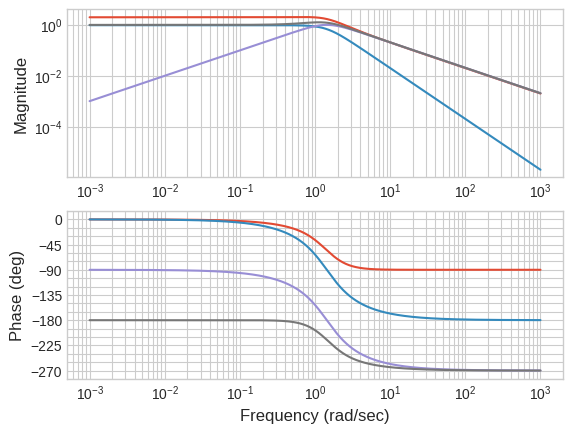

In [121]:
_ = ctrl.bode_plot(sys_for_an_tf_3_3[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_3[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_3[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_3[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [122]:
g_o = ctrl.gram(sys_for_an_3,"o")
np.sqrt(np.trace(B_1.T@g_o@B_1))

2.4497937319958503

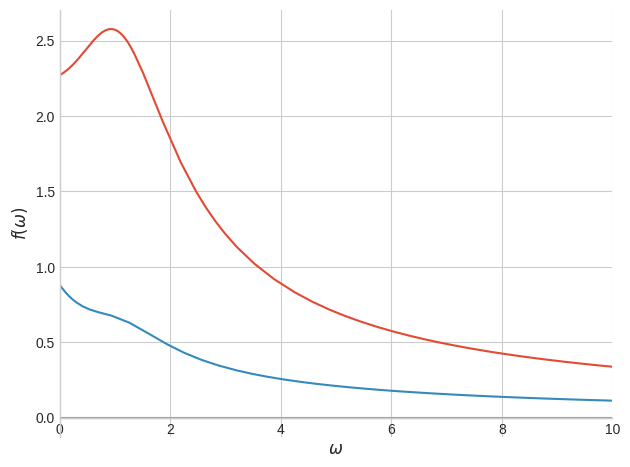

In [123]:
sing = get_singular(sys_for_an_tf_3_3)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

## Task 4

In [124]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [2, 0],
    [0, 2]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [125]:
def generate_Hinf_obs(a,b_1,b_2,c_1,c_2,d_1,d_2,gamma):
    R_1 = c_1.T@np.linalg.inv(d_1@d_1.T)@c_1-(gamma**-2)*c_2.T@c_2
    R_2 = b_2@np.linalg.inv(d_2.T@d_2)@b_2.T-(gamma**-2)*b_1@b_1.T
    p = scipy.linalg.solve_continuous_are(a.T,np.identity(R_1.shape[0]),b_1@b_1.T,np.linalg.inv(R_1))
    q = scipy.linalg.solve_continuous_are(a,np.identity(R_2.shape[0]),c_2.T@c_2,np.linalg.inv(R_2))
    if np.max(np.linalg.eig(p@q)[0]) < gamma ** 2:
        l = -p@np.linalg.inv(np.identity(q.shape[0])-(gamma**-2)*q@p)@(c_1+(gamma**-2)*d_1@b_1.T@q).T@np.linalg.inv(d_1@d_1.T)
        k = -np.linalg.inv(d_2.T@d_2)@b_2.T@q
        return k, l, q
    return None

In [136]:
K_4_1, L_4_1, Q_1 = generate_Hinf_obs(A,B_1,B_2,C_1,C_2,D_1,D_2,10)

In [137]:
np.linalg.eigvals(A+B_2@K_4_1)

array([-1.44187526+0.12445743j, -1.44187526-0.12445743j])

In [138]:
np.linalg.eigvals(A+L_4_1@C_1)

array([-1.1097315+0.43508582j, -1.1097315-0.43508582j])

In [139]:
K_4_2, L_4_2, Q_2 = generate_Hinf_obs(A,B_1,B_2,C_1,C_2,D_1,D_2,5.2)

In [140]:
np.linalg.eigvals(A+B_2@K_4_2)

array([-1.53040863+0.24906619j, -1.53040863-0.24906619j])

In [141]:
np.linalg.eigvals(A+L_4_2@C_1)

array([-82.84689955,  -0.8982413 ])

In [142]:
K_4_3, L_4_3, Q_3 = generate_Hinf_obs(A,B_1,B_2,C_1,C_2,D_1,D_2,7)

In [143]:
np.linalg.eigvals(A+B_2@K_4_3)

array([-1.47336213+0.18069169j, -1.47336213-0.18069169j])

In [144]:
np.linalg.eigvals(A+L_4_3@C_1)

array([-2.2656866 , -1.05436449])

In [145]:
A_new = np.block([
    [A + B_2@K_4_2, -B_2@K_4_2],
    [-(L_4_2@D_1+B_1)*(10**-2)@B_1.T@Q_2, A + L_4_2@C_1 + (L_4_2@D_1+B_1)*(10**-2)@B_1.T@Q_2]
]) 
B_new = np.block([
    [B_1],
    [L_4_2@D_1+B_1]
]) 
C_new = np.block([C_2+D_2@K_4_2, -D_2@K_4_2])
D_new = np.zeros((C_2.shape[0],D_1.shape[1]))
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [147]:
out = ctrl.forced_response(sys_full,time_1,w,np.ones(4)*10)

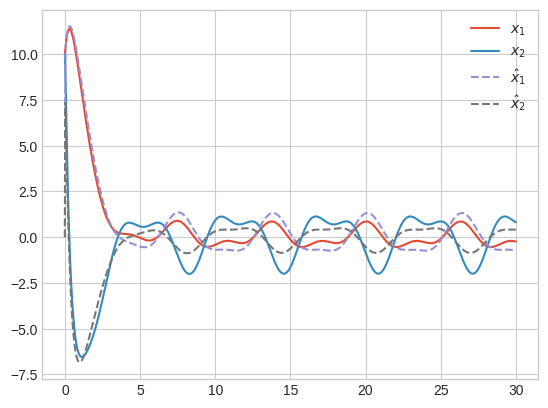

In [149]:
plt.plot(time_1,out.states[0,:],label="$x_1$")
plt.plot(time_1,out.states[1,:],label="$x_2$")
plt.plot(time_1,out.states[0,:]-out.states[2,:],linestyle='--',label="$\hat{x}_1$")
plt.plot(time_1,out.states[1,:]-out.states[3,:],linestyle='--',label="$\hat{x}_2$")
plt.legend()

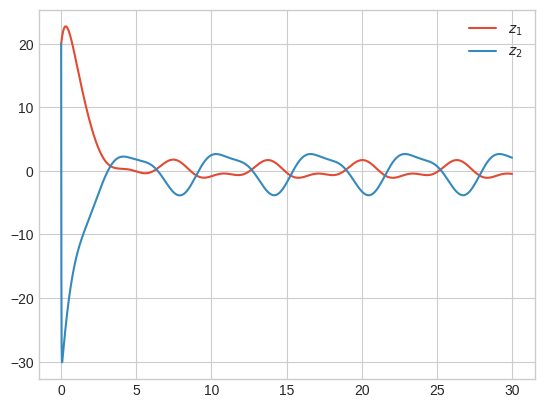

In [151]:
plt.plot(time_1,out.outputs[0,:],label="$z_1$")
plt.plot(time_1,out.outputs[1,:],label="$z_2$")
plt.legend()

In [152]:
sys_for_an_tf = ctrl.ss2tf(sys_full)
sys_for_an_tf

TransferFunction([[array([2.00000000e+00, 1.73420540e+02, 6.64422127e+02, 5.00222086e-12]), array([-2.22044605e-16,  2.00000000e+00,  1.73420540e+02,  6.64422127e+02]), array([-3.17033974e-12, -8.58228201e+02, -3.36777556e+02])], [array([ 1.04276227e-15, -4.29114101e+02, -1.02661698e+03, -3.36777556e+02]), array([   2.        ,  173.42054014,  235.30802626, -168.38877804]), array([-4.29114101e+02, -1.02661698e+03, -3.36777556e+02,  1.30739863e-11])]], [[array([  1.        ,  86.71027007, 332.21106346, 429.11410065,
       168.38877804]), array([  1.        ,  86.71027007, 332.21106346, 429.11410065,
       168.38877804]), array([  1.        ,  86.71027007, 332.21106346, 429.11410065,
       168.38877804])], [array([  1.        ,  86.71027007, 332.21106346, 429.11410065,
       168.38877804]), array([  1.        ,  86.71027007, 332.21106346, 429.11410065,
       168.38877804]), array([  1.        ,  86.71027007, 332.21106346, 429.11410065,
       168.38877804])]])

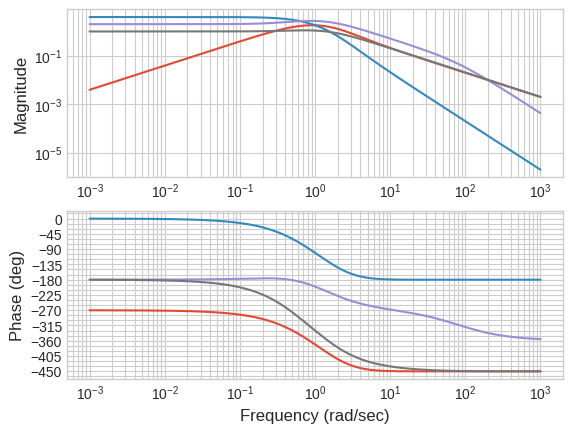

In [153]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

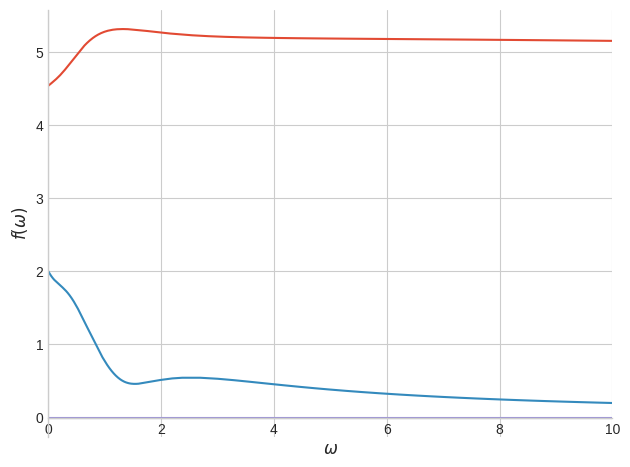

In [154]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [155]:
g_o = ctrl.gram(sys_full,"o")
np.sqrt(np.trace(B_new.T@g_o@B_new))

33.37152723849767

In [156]:
A_new = np.block([
    [A + B_2@K_4_1, -B_2@K_4_1],
    [-(L_4_1@D_1+B_1)*(10**-2)@B_1.T@Q_1, A + L_4_1@C_1 + (L_4_1@D_1+B_1)*(10**-2)@B_1.T@Q_1]
]) 
B_new = np.block([
    [B_1],
    [L_4_1@D_1+B_1]
]) 
C_new = np.block([C_2+D_2@K_4_1, -D_2@K_4_1])
D_new = np.zeros((C_2.shape[0],D_1.shape[1]))
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [157]:
sys_for_an_tf = ctrl.ss2tf(sys_full)
sys_for_an_tf

TransferFunction([[array([2.00000000e+00, 1.00316135e+01, 1.94734106e+01, 5.32907052e-15]), array([2.22044605e-16, 2.00000000e+00, 1.00316135e+01, 1.94734106e+01]), array([-3.58915941e-15, -1.74917901e+01, -5.59644293e+00])], [array([ -8.74589504, -20.29001154,  -5.59644293]), array([ 2.        , 10.03161351, 10.72751559, -2.79822146]), array([-8.74589504e+00, -2.02900115e+01, -5.59644293e+00, -3.48332474e-15])]], [[array([1.        , 5.01580676, 9.73670531, 8.74589504, 2.79822146]), array([1.        , 5.01580676, 9.73670531, 8.74589504, 2.79822146]), array([1.        , 5.01580676, 9.73670531, 8.74589504, 2.79822146])], [array([1.        , 5.01580676, 9.73670531, 8.74589504, 2.79822146]), array([1.        , 5.01580676, 9.73670531, 8.74589504, 2.79822146]), array([1.        , 5.01580676, 9.73670531, 8.74589504, 2.79822146])]])

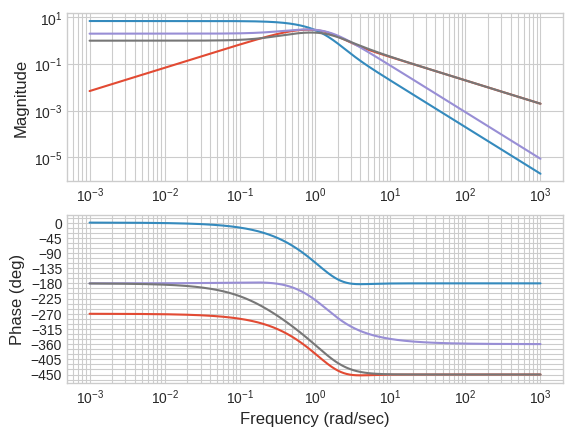

In [158]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

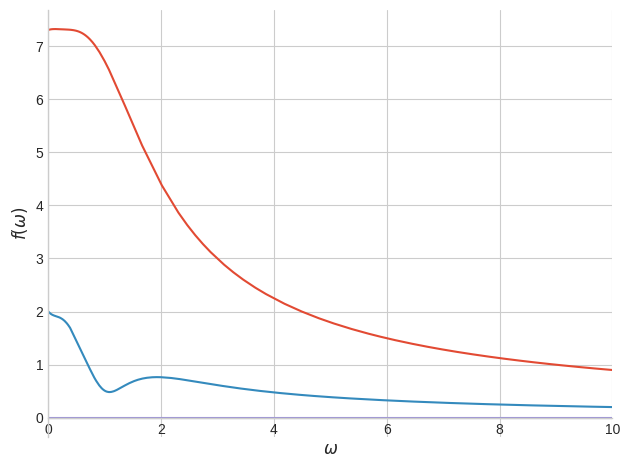

In [159]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [161]:
g_o = ctrl.gram(sys_full,"o")
np.sqrt(np.trace(B_new.T@g_o@B_new))

6.370310846485809

In [162]:
A_new = np.block([
    [A + B_2@K_4_3, -B_2@K_4_3],
    [-(L_4_3@D_1+B_1)*(10**-2)@B_1.T@Q_3, A + L_4_3@C_1 + (L_4_3@D_1+B_1)*(10**-2)@B_1.T@Q_3]
]) 
B_new = np.block([
    [B_1],
    [L_4_3@D_1+B_1]
]) 
C_new = np.block([C_2+D_2@K_4_3, -D_2@K_4_3])
D_new = np.zeros((C_2.shape[0],D_1.shape[1]))
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [163]:
sys_for_an_tf = ctrl.ss2tf(sys_full)
sys_for_an_tf

TransferFunction([[array([2.00000000e+00, 1.23528817e+01, 2.83577016e+01, 7.10542736e-15]), array([ 2.        , 12.35288168, 28.35770162]), array([-3.94442563e-16, -2.87097236e+01, -9.90248247e+00])], [array([ 4.87611855e-16, -1.43548618e+01, -3.36609648e+01, -9.90248247e+00]), array([ 2.        , 12.35288168, 14.00283984, -4.95124123]), array([-1.43548618e+01, -3.36609648e+01, -9.90248247e+00,  1.64729341e-14])]], [[array([ 1.        ,  6.17644084, 14.17885081, 14.35486178,  4.95124123]), array([ 1.        ,  6.17644084, 14.17885081, 14.35486178,  4.95124123]), array([ 1.        ,  6.17644084, 14.17885081, 14.35486178,  4.95124123])], [array([ 1.        ,  6.17644084, 14.17885081, 14.35486178,  4.95124123]), array([ 1.        ,  6.17644084, 14.17885081, 14.35486178,  4.95124123]), array([ 1.        ,  6.17644084, 14.17885081, 14.35486178,  4.95124123])]])

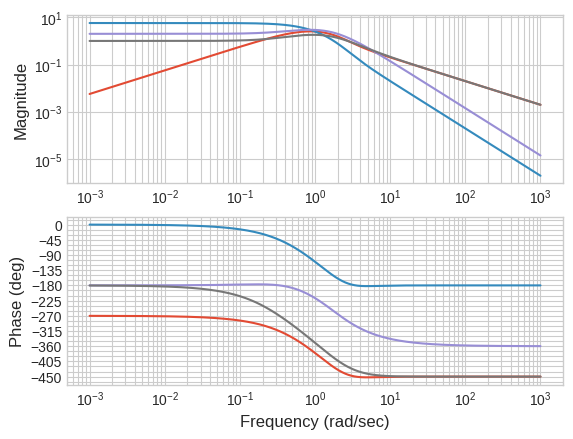

In [164]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

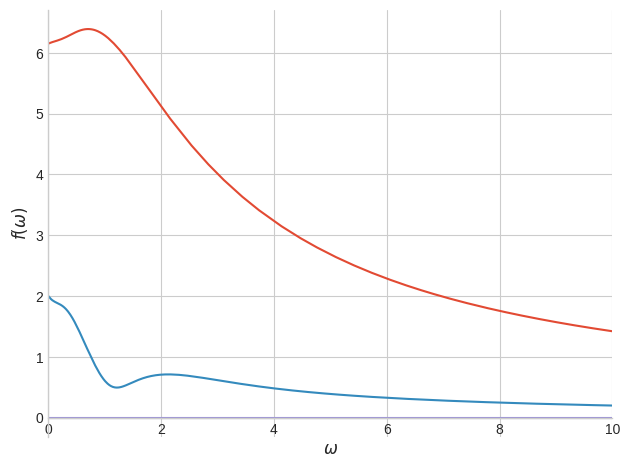

In [165]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [166]:
g_o = ctrl.gram(sys_full,"o")
np.sqrt(np.trace(B_new.T@g_o@B_new))

7.120997581849757